# Wrangle and Analyze Data: WeRateDogs Data Wrangling Project

## Table of Contents

- [Introduction](#intro)                   
- [Data Description](#data)                    
- [Data Wrangling](#wrangle)       
   * [Data Gathering](#gather)                                       
   * [Assessing Data](#assess)                                         
   * [Cleaning Data](#clean)                          
   * [Storing Data](#store)                             
- [Analyzing and Visualizing Data](#anv)         
- [Insights](#insights)
    

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This process is called Data Wrangling.

The dataset that I will be wrangling (and analyzing and visualizing) in this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.

My goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

<a id='data'></a>
## Data Description

In this project, I will work on the following three datasets:

- #### Enhanced WeRateDogs Twitter Archive:

WeRateDogs downloaded their Twitter archive and shared it exclusively for use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets. Each tweet's text is used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) all stored in a  twitter-archive-enhanced.csv file. Of the 5000+ tweets, filtered tweets of ratings only totals 2356.


- #### The tweet Image Predictions File:

Udacity ran every image in the WeRateDogs Twitter archive through a [neural network](https://www.youtube.com/watch?v=2-Ol7ZB0MmU) that can classify breeds of dogs. This resulted in a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). 

The tweet image predictions file (image_predictions.tsv) is present in each tweet according to the neural network and is hosted on Udacity's servers. I downloaded the image predictions file programmatically using the [Requests](https://pypi.org/project/requests/) library and this [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)


- #### Additional data via the Twitter API:

Each tweet's entire set of JSON data is saved in a tweet-json.txt file, which I will read line by line into a pandas DataFrame

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import json
import seaborn as sns

<a id='gather'></a>
## Data Gathering

I have to gather all three pieces of data and load them into the jupyter notebook, even though the methods required to gather each data are different.

The first dataset is the enhanced Twitter Archive (twitter-archive-enhanced.csv), which I will directly download, upload, and read into the pandas DataFrame.

In [2]:
#Reading in the enhanced twitter archive dataset
df_arch = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

In [3]:
#confiming dataset has been read into DataFrame
df_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None




The second dataset is the 'tweet image predictions' (image_predictions.tsv). It is hosted on Udacity's servers and I will download it programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
#create a request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

The HTTP request returned a 200 response which is the HTTP status code for a successful response. This shows that all the text in the text file is in the computer's working memory in the body of the response.

In [6]:
# Save HTML to file
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [7]:
# Reading the file into the dataframe using pandas read_csv
df_tip = pd.read_csv(url, sep='\t')

In [8]:
#confiming dataset has been read into the DataFrame
df_tip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The third dataset is additional data via the 'Twitter API' (tweet_json.txt). The additional data is beyond the data included in the WeRateDogs Twitter archive. I will use the text file provided and read it line by line into the dataframe.

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arch.tweet_id.values
len(tweet_ids)

2356

In [10]:
#Creating a dataframe of the twitter API json text file
df_api = pd.read_json('tweet-json.txt', lines=True)
df_api.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
# read the tweet_json.txt file line by line to create a pandas DataFrame
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data.append(json.loads(line))

json = pd.DataFrame(data)

In [12]:
#slice dataframe to select only columns of interest
json = json[['id', 'retweet_count', 'favorite_count', 'lang']]
json.head(3)

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en


<a id='assess'></a>
## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**, using **both** visual assessment and programmatic assessement to assess the data.

**Note:** I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

In [13]:
#assess archive data
df_arch.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [14]:
#check number of rows and columns
df_arch.shape

(2356, 17)

In [15]:
#get dataframe info
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
#check for datatype of timestamp column
type(df_arch.timestamp[0])

str

In [17]:
#obtain statistics of data
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#check for duplicates
df_arch.duplicated().sum()

0

In [19]:
#check for missing values
df_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
#Check to see counts of unique values in name column
df_arch.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

a number of the dog names aren't real dog names. most of these names start with lower case except 'None'. I'll further assess this using regex

In [21]:
# Using Regex to get the list of all names that are lowercase
lowercase_names = df_arch.name.str.contains('^[a-z]',regex=True)
df_arch[lowercase_names].name.head()

22      such
56         a
118    quite
169    quite
193    quite
Name: name, dtype: object

In [22]:
# Checking count of number of rows where name is in lowercase
len(df_arch[lowercase_names].name)

109

From the assessment, all names starting with lowercase in the name column are not really dog names.

In [23]:
#obtain counts of unique values in rating_denominator column and use sorting index in descending order
df_arch.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
#confirm number of rows where rating denominator is not 10
len(df_arch.rating_denominator[df_arch.rating_denominator != 10])

23

The 23 rows with the rating_denominator != 10 indicates a consistency problem but because I only want original ratings (no retweets), i'll check for data with the rating_denominator not equal to 10,and also with no retweets. 

In [25]:
#check for original ratings with denominator not equal to 10
original_ratings = (df_arch.rating_denominator != 10) & df_arch.retweeted_status_id.isna() 
df_arch[original_ratings].rating_denominator.count()

22

In [26]:
df_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
df_arch.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [28]:
#confirm tidiness rule
df_arch[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [29]:
#Assess tweet image predictions data
df_tip.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [30]:
#check number of rows and columns
df_tip.shape

(2075, 12)

In [31]:
#get dataframe info
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
#obtain statistics of data
df_tip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
#identify data duplicates
df_tip.duplicated().sum()

0

In [34]:
#identify missing data
df_tip.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
#identify irrelevant feature
df_tip.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [36]:
#Identify false dog predictions in the dataset
false_predictions = ~((df_tip.p1_dog) | (df_tip.p2_dog) | (df_tip.p3_dog))
false_predictions_dog = df_tip[false_predictions].index.tolist()
df_tip[false_predictions].head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


In [37]:
#confirm the three columns contain dog breeds and are of the same datatype
print(df_tip.p1.head(1))
print(df_tip.p2.head(1))
print(df_tip.p3.head(1))

0    Welsh_springer_spaniel
Name: p1, dtype: object
0    collie
Name: p2, dtype: object
0    Shetland_sheepdog
Name: p3, dtype: object


In [38]:
#assess twitter api data
json

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en
...,...,...,...,...
2349,666049248165822465,41,111,en
2350,666044226329800704,147,311,en
2351,666033412701032449,47,128,en
2352,666029285002620928,48,132,en


In [39]:
#number of rows and columns
json.shape

(2354, 4)

In [40]:
#get dataframe info
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [41]:
#get dataframe statistics
json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [42]:
#check for duplicates
json.duplicated().sum()

0

In [43]:
#check for missing data
json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
lang              0
dtype: int64

### Quality issues

1.   - 'retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp' columns have 181 non null values.

2.   - The timestamp column is of string datatype not datetime

3.   - erroneous dog names in name column (a, not, quite, incredibly, old, infuriating, such, very, this, getting, mad, all, an etc)

4.   - original ratings have inconsistent denominator ratings

5.   - Source column has html tags along with text

6.   - in_reply_to_user_id','in_reply_to_status_id', 'expanded_urls','name' columns irrelevant to analysis.

7.   - Dog predictions columns have 'False' as part of the data
 
8.   - 'img_num' column is irrelevant to analysis


### Tidiness issues
1. - 'doggo','floofer','pupper','puppo' columns violate the first rule of tidiness: that each variable forms a column.

2. - three different datasets for same data Twitter archive data ('df_arch'), Tweet image predictions ('df_tip'), and additonal data from Twitter API (‘df_apii').

<a id='clean'></a>
## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing. 

In [44]:
# Make copies of original pieces of data
arch_clean = df_arch.copy()
image_clean = df_tip.copy()
api_clean = json.copy()

### Issue #1: 'retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp' columns have 181 non null values not required for project.

#### Define  
    dropping non-null rows from 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns because only original ratings are of interest, not retweets.

#### Code

In [45]:
#drop non-null rows
arch_clean = arch_clean.drop(arch_clean.dropna(subset=['retweeted_status_id']).index)

#### Test

In [46]:
arch_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [47]:
arch_clean.retweeted_status_id.notnull().sum()

0

In [48]:
arch_clean.retweeted_status_user_id.notnull().sum()

0

In [49]:
arch_clean.retweeted_status_timestamp.notnull().sum()

0

### Issue #2: Timestamp column is a string

#### Define: 
    change datatype of timestamp column from string to datetime

#### Code

In [50]:
#Change timestamp datatype
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

#### Test

In [51]:
#confirm change
type(arch_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #3: erroneous dog names in name column

#### Define
    Remove rows where dog name is in lowercase

#### Code

In [52]:
# Use Regex to get the list of all names that are lowercase
lowercase_names = arch_clean.name.str.contains('^[a-z]',regex=True)
arch_clean[lowercase_names].name.head()

22      such
56         a
169    quite
193    quite
335      not
Name: name, dtype: object

In [53]:
# Check count of number of rows where name is in lowercase
len(arch_clean[lowercase_names].name)

104

In [54]:
# Filter to get only rows where name contains with Upper case letter
arch_clean = arch_clean[arch_clean['name'].str.contains('^[A-Z]+')]

#### Test

In [55]:
len(arch_clean[lowercase_names].name)

C:\Users\Uwakmfon\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

### Issue #4:  inconsistent denominator ratings

#### Define
    Drop rows where rating_denominator is not 10

#### Code

In [56]:
#check for original ratings with denominator not equal to 10
original_ratings = (df_arch.rating_denominator != 10) 
df_arch[original_ratings].rating_denominator.count()

23

In [57]:
#Filter to get only rows where rating_denominator is equal to 10
arch_clean = arch_clean[arch_clean.rating_denominator == 10]

#### Test

In [58]:
arch_clean.rating_denominator.value_counts()

10    2052
Name: rating_denominator, dtype: int64

In [59]:
#confirm result
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2052 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2052 non-null   datetime64[ns, UTC]
 4   source                      2052 non-null   object             
 5   text                        2052 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1998 non-null   object             
 10  rating_numerator            2052 non-null   int64           

### Issue #5: Source column has html tags along with text

#### Define 
    Extract text from source column

#### Code

In [60]:
#Extract text from source column using regex
arch_clean['source'] = arch_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [61]:
arch_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #6:  in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls', 'name' are irrelevant columns to analysis

#### Define
    Remove irrelevant columns in the archive dataset  

#### Code

In [62]:
drop_columns = ['in_reply_to_user_id','in_reply_to_status_id','expanded_urls', 'name', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
arch_clean.drop(drop_columns,axis=1,inplace=True)

#### Test

In [63]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2052 non-null   int64              
 1   timestamp           2052 non-null   datetime64[ns, UTC]
 2   source              2052 non-null   object             
 3   text                2052 non-null   object             
 4   rating_numerator    2052 non-null   int64              
 5   rating_denominator  2052 non-null   int64              
 6   doggo               2052 non-null   object             
 7   floofer             2052 non-null   object             
 8   pupper              2052 non-null   object             
 9   puppo               2052 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 176.3+ KB


### Issue #7: Dog prediction columns have 'False' as part of the data

#### Define
      Remove the false dogs predictions from the twitter image predictions dataset

#### Code

In [64]:
wrong_predictions = ~((image_clean.p1_dog) | (image_clean.p2_dog) | (image_clean.p3_dog))
wrong_predictions_dog = image_clean[false_predictions].index.tolist()

#dropping off the falsly predicted data points
image_clean.drop(wrong_predictions_dog, inplace = True)
image_clean = image_clean.reset_index(drop = True)

#### Test

In [65]:
image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8: 'img_num' column is irrelevant to analysis

#### Define
    Remove 'img_num'

#### Code

In [66]:
image_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [67]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 114.7+ KB


### Issue #9: 'doggo', 'floofer', 'pupper', 'puppo' columns violate the first rule of tidiness: that each variable forms a column.

#### Define
    Put the dog type information all in one column because they contain same information.

#### Code

In [68]:
#join columns using lambda
arch_clean['dog_stage'] = arch_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)

#replace characters with no space
arch_clean = arch_clean.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

#drop extra columns
arch_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1,inplace=True)

#Replace empty spaces with NaN in the dog_stage column
arch_clean['dog_stage'] = arch_clean['dog_stage'].replace(regex=r'', value= np.nan)

#### Test

In [69]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2052 non-null   int64              
 1   timestamp           2052 non-null   datetime64[ns, UTC]
 2   source              2052 non-null   object             
 3   text                2052 non-null   object             
 4   rating_numerator    2052 non-null   int64              
 5   rating_denominator  2052 non-null   int64              
 6   dog_stage           330 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 128.2+ KB


In [70]:
#drop dog_stage column
arch_clean.drop('dog_stage', axis=1, inplace=True)

### Issue #10: three different datasets for same data.

#### Define
    merge datasets into one dataframe 

#### Code

In [71]:
#rename id column name
api_clean.rename(columns={"id":"tweet_id"},inplace=True)
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [72]:
# merge inner to get only tweets that appear in both dataframe
df = arch_clean.merge(api_clean, how='inner', on='tweet_id')
master_df =df.merge(image_clean, how='inner', on='tweet_id')

#### Test

In [73]:
master_df.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,retweet_count,favorite_count,lang,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,6514,33819,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,4328,25461,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,8964,42908,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,9774,41048,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,3261,20562,en,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [74]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1591 non-null   int64              
 1   timestamp           1591 non-null   datetime64[ns, UTC]
 2   source              1591 non-null   object             
 3   text                1591 non-null   object             
 4   rating_numerator    1591 non-null   int64              
 5   rating_denominator  1591 non-null   int64              
 6   retweet_count       1591 non-null   int64              
 7   favorite_count      1591 non-null   int64              
 8   lang                1591 non-null   object             
 9   jpg_url             1591 non-null   object             
 10  p1                  1591 non-null   object             
 11  p1_conf             1591 non-null   float64            
 12  p1_dog              1591 non-null 

#### Define: feature engineering on 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns
    Make a 'final_prediction' column for dogs

#### Code

In [75]:
columns = ['p1_dog','p2_dog','p3_dog']
pred = []
preds = []

for index in range(0,master_df.shape[0]):
    for col in columns:
      if master_df.loc[index,col] == True:
            pred.append(col)
    try:
      preds.append(pred)
    except:
      pred = []

In [76]:
mapping_col = {'p1_dog': ['p1','p1_conf'], 'p2_dog': ['p2','p2_conf'], 'p3_dog': ['p3','p3_conf']}
predictions = []
conf1 = []


for index in range(master_df.shape[0]):
    predictions.append(master_df.loc[index,mapping_col[preds[index][0]][0]])
    conf1.append(master_df.loc[index,mapping_col[preds[index][0]][1]])

master_df['model_predictions'] = pd.Series(predictions)
master_df['confidence_level']  = pd.Series(conf1)

In [77]:
#drop 'p1', 'p2', 'p3', 'p1_dog', 'p1_conf', 'p2_dog', 'p2_conf', 'p3_dog', 'p3_conf' columns
master_df.drop(['p1','p2','p3','p1_dog','p1_conf','p2_dog','p2_conf','p3_dog','p3_conf'],axis=1,inplace=True)

In [78]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1591 non-null   int64              
 1   timestamp           1591 non-null   datetime64[ns, UTC]
 2   source              1591 non-null   object             
 3   text                1591 non-null   object             
 4   rating_numerator    1591 non-null   int64              
 5   rating_denominator  1591 non-null   int64              
 6   retweet_count       1591 non-null   int64              
 7   favorite_count      1591 non-null   int64              
 8   lang                1591 non-null   object             
 9   jpg_url             1591 non-null   object             
 10  model_predictions   1591 non-null   object             
 11  confidence_level    1591 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
#save cleaned dataset as a csv file
master_df.to_csv('twitter_archive_master.csv')

<a id='anv'></a>
## Analyzing and Visualizing Data
In this section, I will analyze and visualize the wrangled data.

In [80]:
#Make a copy of cleaned master dataset
master_twitter_archive = master_df.copy()

In [81]:
master_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1590
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1591 non-null   int64              
 1   timestamp           1591 non-null   datetime64[ns, UTC]
 2   source              1591 non-null   object             
 3   text                1591 non-null   object             
 4   rating_numerator    1591 non-null   int64              
 5   rating_denominator  1591 non-null   int64              
 6   retweet_count       1591 non-null   int64              
 7   favorite_count      1591 non-null   int64              
 8   lang                1591 non-null   object             
 9   jpg_url             1591 non-null   object             
 10  model_predictions   1591 non-null   object             
 11  confidence_level    1591 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [82]:
master_twitter_archive.source.value_counts()

Twitter for iPhone    1563
Twitter Web Client      19
TweetDeck                9
Name: source, dtype: int64

Text(0.5, 0, 'Tweet Source')

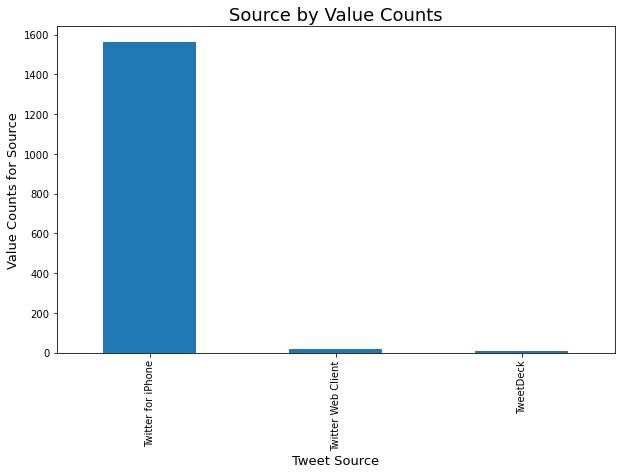

In [83]:
master_twitter_archive.source.value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Source by Value Counts', fontsize=18)
plt.ylabel('Value Counts for Source', fontsize=13)
plt.xlabel('Tweet Source', fontsize=13)

In [84]:
master_twitter_archive.groupby('model_predictions')['favorite_count'].sum().sort_values(ascending=False)

model_predictions
golden_retriever      1638035
Labrador_retriever    1093097
Pembroke               954213
Chihuahua              673876
Samoyed                491651
                       ...   
seashore                  525
ox                        417
window_shade              345
piggy_bank                344
hay                       258
Name: favorite_count, Length: 210, dtype: int64

Text(0.5, 0, 'Dog Specie')

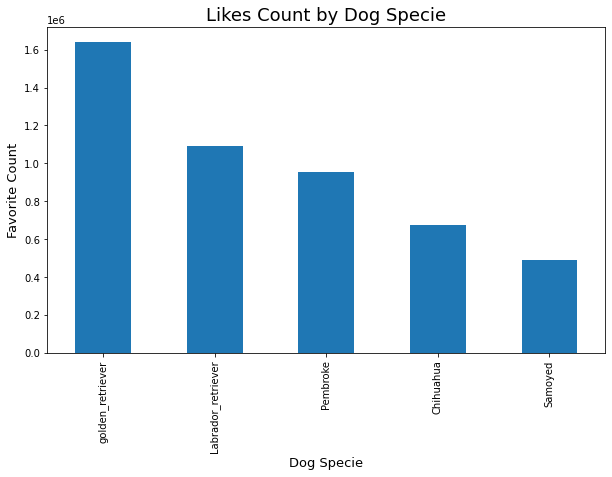

In [85]:
master_twitter_archive.groupby('model_predictions')['favorite_count'].sum().sort_values(ascending=False).head().plot(kind='bar', figsize=(10,6))
plt.title('Likes Count by Dog Specie', fontsize=18)
plt.ylabel('Favorite Count', fontsize=13)
plt.xlabel('Dog Specie', fontsize=13)

Text(0.5, 0, 'Dog Specie')

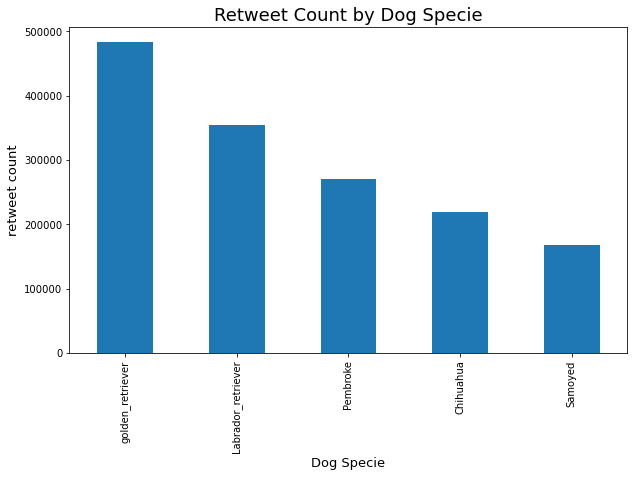

In [86]:
master_twitter_archive.groupby('model_predictions')['retweet_count'].sum().sort_values(ascending=False).head().plot(kind='bar', figsize=(10,6))
plt.title('Retweet Count by Dog Specie', fontsize=18)
plt.ylabel('retweet count', fontsize=13)
plt.xlabel('Dog Specie', fontsize=13)

In [87]:
master_twitter_archive['model_predictions'].value_counts().head(10)

golden_retriever      131
Labrador_retriever     89
Pembroke               84
Chihuahua              77
pug                    51
chow                   38
Samoyed                38
Pomeranian             36
toy_poodle             34
malamute               28
Name: model_predictions, dtype: int64

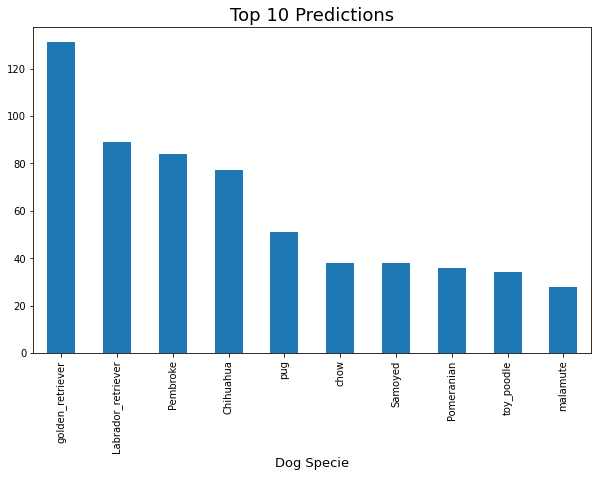

In [88]:
plt.figure(figsize=(10,6))
master_twitter_archive['model_predictions'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Predictions', fontsize=18)
plt.xlabel('Dog Specie', fontsize=13);

[Text(0.5, 1.0, 'Correlation between Retweets and Likes')]

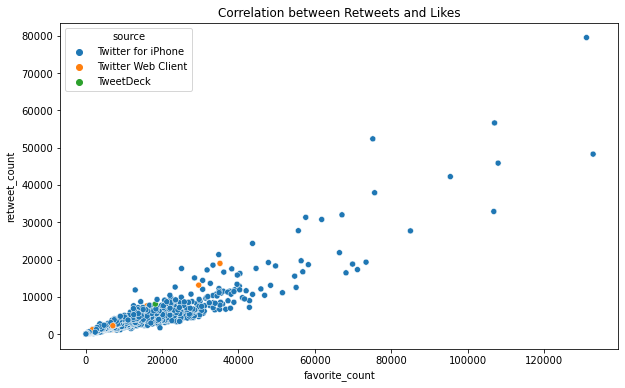

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='favorite_count',y='retweet_count',hue='source',data=master_twitter_archive).set(
    title="Correlation between Retweets and Likes")

<a id='insights'></a>
## Insights:
1. The source of most WeRateDogs account tweets are from an iPhone using the Twitter app.


2. A tweet containing the image of a Golden retriever has the most likes and retweets of all dog species posted.


3. Exploring the relationship between favourite_count and retweet_count variables, revealed a linear relationship between both. Tweets with more retweets are likely to have a high number of likes. It is also likely that tweets made from an iPhone get more likes than others although this maybe be dependent on other factors, like content of tweet.